In [1]:
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
#exportando dados do yahoo para uma ação simples
df = wb.DataReader("WEGE3.SA", data_source = "yahoo", start="1-1-2015")
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-26,73.570000,71.000000,71.199997,72.739998,5567200.0,72.706177
2021-03-29,72.800003,71.309998,72.199997,72.099998,4934400.0,72.099998
2021-03-30,75.449997,71.519997,71.739998,75.050003,6287700.0,75.050003
2021-03-31,76.360001,74.019997,75.489998,74.559998,6042600.0,74.559998
2021-04-01,77.570000,74.760002,75.279999,75.059998,6445100.0,75.059998


In [3]:
#retorno simples
df['simp_return'] = df['Close'].pct_change()
df.tail()

,High,Low,Open,Close,Volume,Adj Close,simp_return
Date,,,,,,,
2021-03-26,73.570000,71.000000,71.199997,72.739998,5567200.0,72.706177,0.023498
2021-03-29,72.800003,71.309998,72.199997,72.099998,4934400.0,72.099998,-0.008798
2021-03-30,75.449997,71.519997,71.739998,75.050003,6287700.0,75.050003,0.040915
2021-03-31,76.360001,74.019997,75.489998,74.559998,6042600.0,74.559998,-0.006529
2021-04-01,77.570000,74.760002,75.279999,75.059998,6445100.0,75.059998,0.006706


In [4]:
##retorno simples acumulado
df['simp_ret_cum'] = (df['simp_return'] + 1).cumprod()-1
df.tail()

,High,Low,Open,Close,Volume,Adj Close,simp_return,simp_ret_cum
Date,,,,,,,,
2021-03-26,73.570000,71.000000,71.199997,72.739998,5567200.0,72.706177,0.023498,5.140390
2021-03-29,72.800003,71.309998,72.199997,72.099998,4934400.0,72.099998,-0.008798,5.086364
2021-03-30,75.449997,71.519997,71.739998,75.050003,6287700.0,75.050003,0.040915,5.335390
2021-03-31,76.360001,74.019997,75.489998,74.559998,6042600.0,74.559998,-0.006529,5.294026
2021-04-01,77.570000,74.760002,75.279999,75.059998,6445100.0,75.059998,0.006706,5.336234


In [5]:
#Corrigindo posição
df['log_return'] = np.log(df['Close']/df['Close'].shift(1))
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,simp_return,simp_ret_cum,log_return
Date,,,,,,,,,
2021-03-26,73.570000,71.000000,71.199997,72.739998,5567200.0,72.706177,0.023498,5.140390,0.023226
2021-03-29,72.800003,71.309998,72.199997,72.099998,4934400.0,72.099998,-0.008798,5.086364,-0.008837
2021-03-30,75.449997,71.519997,71.739998,75.050003,6287700.0,75.050003,0.040915,5.335390,0.040101
2021-03-31,76.360001,74.019997,75.489998,74.559998,6042600.0,74.559998,-0.006529,5.294026,-0.006550
2021-04-01,77.570000,74.760002,75.279999,75.059998,6445100.0,75.059998,0.006706,5.336234,0.006684


In [6]:
#Retorno logarítmico
df['log_ret_cum'] = df['log_return'].cumsum()
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,simp_return,simp_ret_cum,log_return,log_ret_cum
Date,,,,,,,,,,
2021-03-26,73.570000,71.000000,71.199997,72.739998,5567200.0,72.706177,0.023498,5.140390,0.023226,1.814888
2021-03-29,72.800003,71.309998,72.199997,72.099998,4934400.0,72.099998,-0.008798,5.086364,-0.008837,1.806051
2021-03-30,75.449997,71.519997,71.739998,75.050003,6287700.0,75.050003,0.040915,5.335390,0.040101,1.846151
2021-03-31,76.360001,74.019997,75.489998,74.559998,6042600.0,74.559998,-0.006529,5.294026,-0.006550,1.839601
2021-04-01,77.570000,74.760002,75.279999,75.059998,6445100.0,75.059998,0.006706,5.336234,0.006684,1.846285


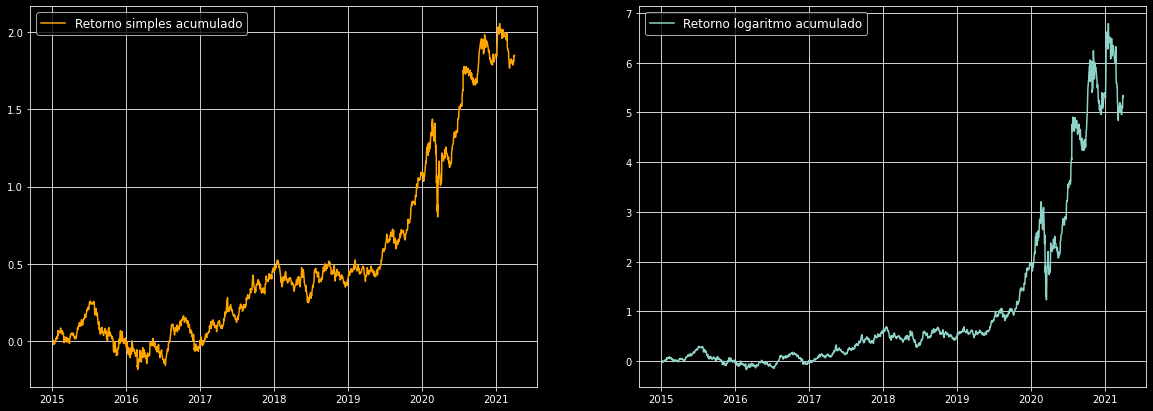

In [7]:
#plotando os gráficos de retorno acumulado
plt.style.use("dark_background")
fig,((ax1,ax2)) = plt.subplots(figsize=(20,7), ncols=2)
ax1.plot(df['log_ret_cum'], color="orange")
ax1.legend(["Retorno simples acumulado"],fontsize=12)
ax2.plot(df["simp_ret_cum"])
ax2.legend(["Retorno logaritmo acumulado"], fontsize=12)
ax1.grid(ls="-")
ax2.grid(ls="-")

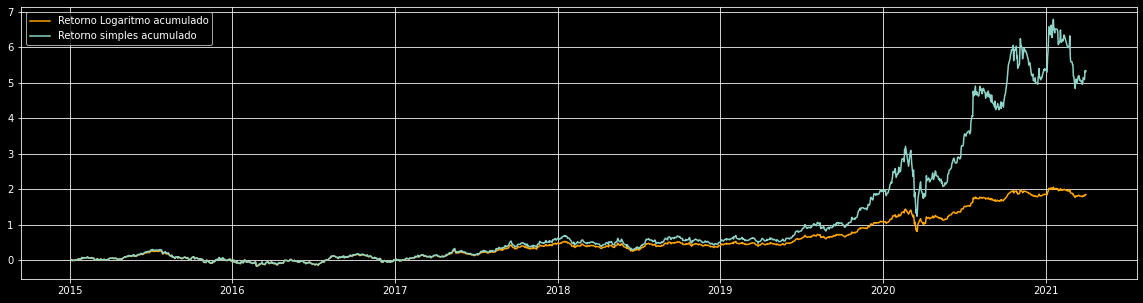

In [8]:
# Se quiser ver os dois gráficos compatilhando o mesmo eixo, execute essa célula
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(df['log_ret_cum'], color="orange")
ax.plot(df["simp_ret_cum"])
ax.legend(["Retorno Logaritmo acumulado","Retorno simples acumulado"])
ax.grid(ls="-")

In [9]:
#Exportando o preço de fechamento para toda a carteira
acoes = ["WEGE3.SA","MGLU3.SA","EGIE3.SA","ITUB4.SA", "TAEE11.SA","ODPV3.SA","PSSA3.SA","BOVA11.SA","IVVB11.SA"]
carteira = pd.DataFrame()
for i in acoes:
    carteira[i] = yf.download(i,period="1y")["Adj Close"]
carteira

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,WEGE3.SA,MGLU3.SA,EGIE3.SA,ITUB4.SA,TAEE11.SA,ODPV3.SA,PSSA3.SA,BOVA11.SA,IVVB11.SA
Date,,,,,,,,,
2020-04-01,32.150311,9.146593,35.878006,20.965933,22.841713,14.153563,40.701321,68.180000,140.500000
2020-04-02,33.805908,8.758571,35.793476,21.063898,23.686705,14.335756,41.715775,69.629997,143.500000
2020-04-03,32.606342,8.673157,35.276905,20.240934,23.821543,14.335756,39.961815,66.900002,143.500000
2020-04-06,32.992981,9.322302,36.488491,21.730108,24.360899,13.693286,42.938805,71.570000,150.800003
2020-04-07,36.978313,9.783534,36.103416,22.533472,24.271006,12.906975,44.048061,73.510002,149.649994
...,...,...,...,...,...,...,...,...,...
2021-03-26,72.706177,19.980000,41.220001,28.054947,36.099998,13.360000,45.652599,110.446930,245.550003
2021-03-29,72.099998,19.650000,41.180000,28.044952,38.369999,13.090000,45.439087,111.060303,249.220001
2021-03-30,75.050003,20.059999,41.560001,28.504705,39.189999,13.010000,45.701122,NaN,247.389999


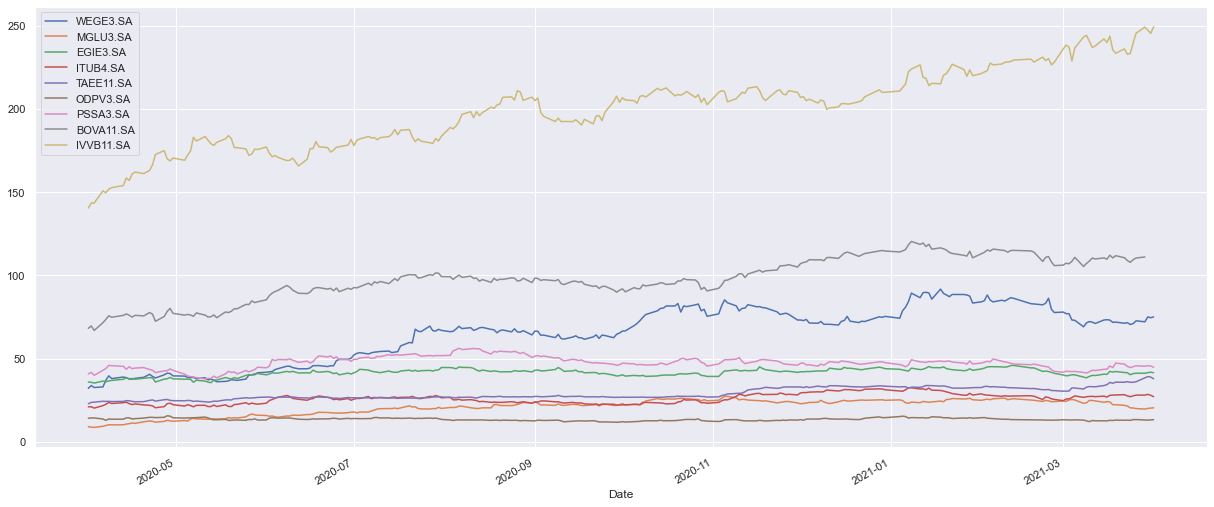

In [10]:
#Preço de fechamento de todas as ações
sns.set()
carteira.plot(figsize=(21,9))

In [11]:
#Mudança percentual de um dia para outro
retorno = carteira.pct_change()
retorno

,WEGE3.SA,MGLU3.SA,EGIE3.SA,ITUB4.SA,TAEE11.SA,ODPV3.SA,PSSA3.SA,BOVA11.SA,IVVB11.SA
Date,,,,,,,,,
2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,0.051496,-0.042423,-0.002356,0.004673,0.036993,0.012873,0.024924,0.021267,0.021352
2020-04-03,-0.035484,-0.009752,-0.014432,-0.039070,0.005693,0.000000,-0.042045,-0.039207,0.000000
2020-04-06,0.011858,0.074845,0.034345,0.073572,0.022642,-0.044816,0.074496,0.069806,0.050871
2020-04-07,0.120793,0.049476,-0.010553,0.036970,-0.003690,-0.057423,0.025833,0.027106,-0.007626
...,...,...,...,...,...,...,...,...,...
2021-03-26,0.023498,-0.015764,0.005611,0.017053,0.008944,0.002251,0.011395,0.009086,0.024363
2021-03-29,-0.008337,-0.016517,-0.000970,-0.000356,0.062881,-0.020210,-0.004677,0.005554,0.014946
2021-03-30,0.040915,0.020865,0.009228,0.016393,0.021371,-0.006112,0.005767,0.000000,-0.007343


In [12]:
retorno_anual = retorno.mean() * 264
retorno_anual

WEGE3.SA     1.013942
MGLU3.SA     0.970569
EGIE3.SA     0.196462
ITUB4.SA     0.366022
TAEE11.SA    0.568880
ODPV3.SA    -0.001550
PSSA3.SA     0.164178
BOVA11.SA    0.560806
IVVB11.SA    0.649875
dtype: float64

In [13]:
cov = retorno.cov() * 264
cov

,WEGE3.SA,MGLU3.SA,EGIE3.SA,ITUB4.SA,TAEE11.SA,ODPV3.SA,PSSA3.SA,BOVA11.SA,IVVB11.SA
WEGE3.SA,0.201500,0.075825,0.042274,0.047496,0.020641,0.026715,0.049882,0.060237,0.004291
MGLU3.SA,0.075825,0.208111,0.041574,0.017665,0.017850,0.020706,0.039087,0.047069,0.004122
EGIE3.SA,0.042274,0.041574,0.080730,0.054410,0.031694,0.031531,0.048489,0.047118,-0.006144
ITUB4.SA,0.047496,0.017665,0.054410,0.180652,0.030127,0.038837,0.066936,0.095079,-0.003534
TAEE11.SA,0.020641,0.017850,0.031694,0.030127,0.046662,0.012921,0.020584,0.025178,-0.006386
ODPV3.SA,0.026715,0.020706,0.031531,0.038837,0.012921,0.134926,0.019018,0.031098,-0.002754
PSSA3.SA,0.049882,0.039087,0.048489,0.066936,0.020584,0.019018,0.123760,0.056921,0.000151
BOVA11.SA,0.060237,0.047069,0.047118,0.095079,0.025178,0.031098,0.056921,0.076776,0.002247
IVVB11.SA,0.004291,0.004122,-0.006144,-0.003534,-0.006386,-0.002754,0.000151,0.002247,0.062036


In [14]:
corr = retorno.corr()
corr

,WEGE3.SA,MGLU3.SA,EGIE3.SA,ITUB4.SA,TAEE11.SA,ODPV3.SA,PSSA3.SA,BOVA11.SA,IVVB11.SA
WEGE3.SA,1.000000,0.370276,0.331446,0.248941,0.212866,0.162018,0.315879,0.484295,0.038376
MGLU3.SA,0.370276,1.000000,0.320740,0.091105,0.181140,0.123566,0.243554,0.372366,0.036280
EGIE3.SA,0.331446,0.320740,1.000000,0.450545,0.516395,0.302119,0.485108,0.598481,-0.086819
ITUB4.SA,0.248941,0.091105,0.450545,1.000000,0.328141,0.248758,0.447658,0.807325,-0.033386
TAEE11.SA,0.212866,0.181140,0.516395,0.328141,1.000000,0.162845,0.270867,0.420664,-0.118696
ODPV3.SA,0.162018,0.123566,0.302119,0.248758,0.162845,1.000000,0.147174,0.305542,-0.030099
PSSA3.SA,0.315879,0.243554,0.485108,0.447658,0.270867,0.147174,1.000000,0.583936,0.001725
BOVA11.SA,0.484295,0.372366,0.598481,0.807325,0.420664,0.305542,0.583936,1.000000,0.032556
IVVB11.SA,0.038376,0.036280,-0.086819,-0.033386,-0.118696,-0.030099,0.001725,0.032556,1.000000


In [15]:
num_acoes = len(acoes)
num_carteiras = 100000 ##Mude isso para incluir mais possibilidades de distribuição na carteira

lista_retornos = []
lista_volatilidade = []
lista_pesos = []
lista_sharpe_ratio = []

In [16]:
for carteira in range(num_carteiras):
  peso = np.random.random(num_acoes)
  peso /= np.sum(peso)
  lista_pesos.append(peso)
  retorno_esperado = np.dot(peso, retorno_anual)
  lista_retornos.append(retorno_esperado)
  volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
  lista_volatilidade.append(volatilidade)
  sharpe_ratio = retorno_esperado/volatilidade
  lista_sharpe_ratio.append(sharpe_ratio)

In [17]:
dic_carteiras = {'Retorno': lista_retornos, 'Volatilidade': lista_volatilidade, 'Sharpe Ratio': lista_sharpe_ratio}
for contar,acao in enumerate(acoes):
  dic_carteiras[acao+' Peso'] = [Peso[contar] for Peso in lista_pesos]
portfolios = pd.DataFrame(dic_carteiras)
colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in acoes]

portfolios = portfolios[colunas]
portfolios

,Retorno,Volatilidade,Sharpe Ratio,WEGE3.SA Peso,MGLU3.SA Peso,EGIE3.SA Peso,ITUB4.SA Peso,TAEE11.SA Peso,ODPV3.SA Peso,PSSA3.SA Peso,BOVA11.SA Peso,IVVB11.SA Peso
0,0.367342,0.239039,1.536747,0.174553,0.001027,0.039812,0.143925,0.019209,0.346355,0.101444,0.124120,0.049556
1,0.445069,0.201617,2.207493,0.131552,0.061271,0.171083,0.120761,0.102729,0.158784,0.090708,0.052618,0.110494
2,0.487545,0.196663,2.479092,0.161962,0.083218,0.214036,0.060724,0.022892,0.166998,0.036440,0.060169,0.193561
3,0.489581,0.216680,2.259462,0.170583,0.034428,0.172176,0.121896,0.043339,0.103687,0.070544,0.173503,0.109843
4,0.408806,0.190784,2.142774,0.075617,0.009761,0.060425,0.064379,0.193135,0.138638,0.227872,0.105824,0.124350
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.535243,0.201441,2.657066,0.131216,0.071275,0.080472,0.005761,0.056567,0.039973,0.198224,0.227252,0.189261
99996,0.422110,0.194546,2.169718,0.016017,0.157040,0.087321,0.080357,0.165180,0.186367,0.172590,0.033086,0.102042
99997,0.480541,0.206671,2.325156,0.179056,0.016056,0.156199,0.111057,0.135882,0.125278,0.072645,0.105828,0.097999
99998,0.613779,0.227767,2.694768,0.171660,0.175330,0.133701,0.142232,0.133381,0.028914,0.026446,0.127327,0.061008


Text(0.5, 1.0, 'Fronteira Eficiente de Markowitz')

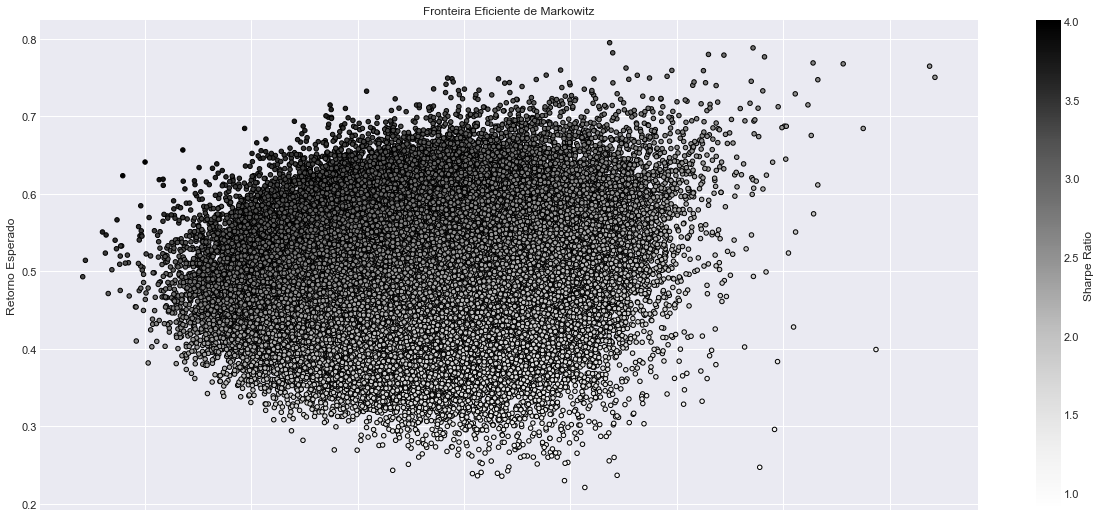

In [18]:
plt.style.use('seaborn-dark')
portfolios.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio', edgecolors='black',figsize=(21,9), grid=True)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')

In [19]:
#Carteira com menor flutuação
menor_volatilidade = portfolios['Volatilidade'].min()
carteira_min_variancia = portfolios.loc[portfolios['Volatilidade'] == menor_volatilidade]
carteira_min_variancia.T

,69957
Retorno,0.492987
Volatilidade,0.148313
Sharpe Ratio,3.323968
WEGE3.SA Peso,0.022408
MGLU3.SA Peso,0.031924
EGIE3.SA Peso,0.071034
ITUB4.SA Peso,0.036174
TAEE11.SA Peso,0.280483
ODPV3.SA Peso,0.161266
PSSA3.SA Peso,0.005625


In [20]:
#Carteira com maior Sharpe Ratio
maior_sharpe = portfolios['Sharpe Ratio'].max()
carteira_maior_sharpe = portfolios.loc[portfolios['Sharpe Ratio'] == maior_sharpe]
carteira_maior_sharpe.T

,67980
Retorno,0.640975
Volatilidade,0.160032
Sharpe Ratio,4.005290
WEGE3.SA Peso,0.145034
MGLU3.SA Peso,0.038605
EGIE3.SA Peso,0.018145
ITUB4.SA Peso,0.016550
TAEE11.SA Peso,0.255896
ODPV3.SA Peso,0.038192
PSSA3.SA Peso,0.019053


In [21]:
# Se quiser exportar seus dados para o excel, execute essa célula
portfolios.to_excel("Markowitz.xlsx", index=False)